In [3]:
%load_ext autoreload
%autoreload 2
import os 
os.chdir("/home/jadli/Desktop/BDAI2/Satellite_Super_Resulotion0")
import os
import random
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

✔ Model loaded (best PSNR = 28.28)


/tmp/ipykernel_70259/1266138169.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)


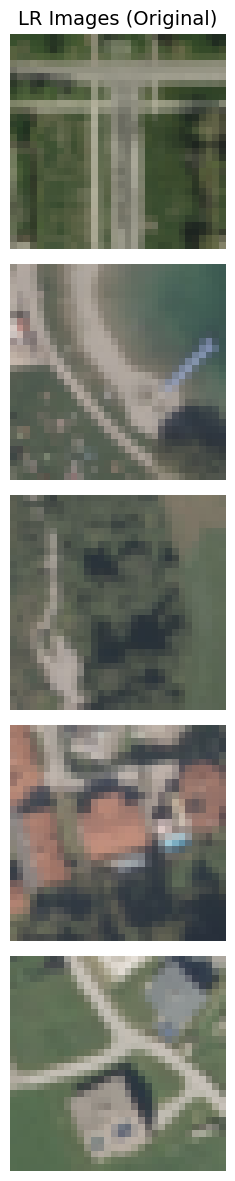

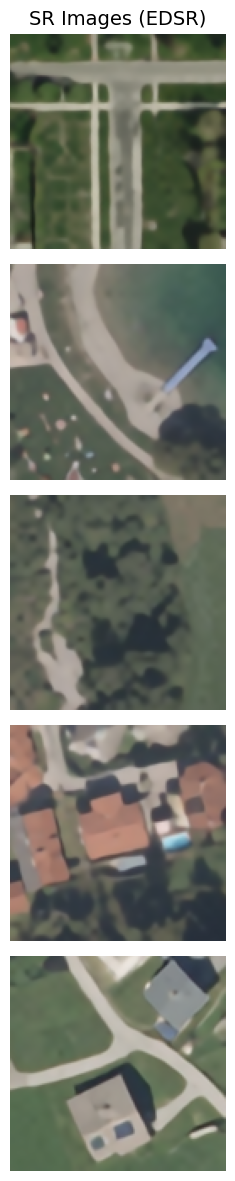

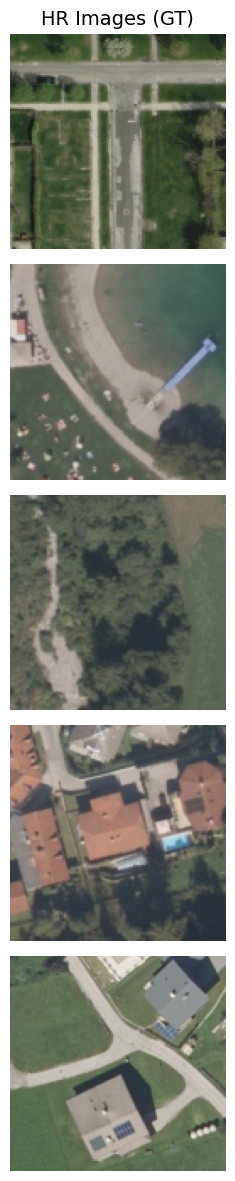

In [5]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from src.utils.models_architecture import EDSR
# ================= CONFIG =================
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

TEST_DIR = "data_test"
HR_DIR = "data/preprocessed/test/HR"
BEST_MODEL_PATH = "MODEL_TEST/best_EDSR.pth"
SCALE = 4

to_tensor = transforms.ToTensor()

# ================= LOAD MODEL =================
model = EDSR(scale_factor=SCALE).to(DEVICE)
ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
model.load_state_dict(ckpt["model"])
model.eval()

print(f"✔ Model loaded (best PSNR = {ckpt['best_psnr']:.2f})")

# ================= LOAD IMAGES =================
img_names = sorted(os.listdir(TEST_DIR))

lr_imgs, sr_imgs, hr_imgs = [], [], []

with torch.no_grad():
    for name in img_names:
        # LR from data_test
        lr_img = Image.open(os.path.join(TEST_DIR, name)).convert("RGB")

        # HR from HR folder (same filename)
        hr_img = Image.open(os.path.join(HR_DIR, name)).convert("RGB")

        lr = to_tensor(lr_img).unsqueeze(0).to(DEVICE)
        sr = torch.clamp(model(lr), 0.0, 1.0)

        lr_imgs.append(lr_img)
        sr_imgs.append(sr.squeeze().permute(1, 2, 0).cpu())
        hr_imgs.append(hr_img)

# ================= PLOT FUNCTION =================
def plot_column(images, title):
    fig, axes = plt.subplots(len(images), 1, figsize=(4, 12))

    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.96)
    plt.show()

# ================= PLOTS =================
plot_column(lr_imgs, "LR Images (Original)")
plot_column(sr_imgs, "SR Images (EDSR)")
plot_column(hr_imgs, "HR Images (GT)")


In [ ]:
%load_ext autoreload
%autoreload 2
import os 
os.chdir("/home/jadli/Desktop/BDAI2/Satellite_Super_Resulotion0")
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from skimage.metrics import structural_similarity as ssim
from src.utils.models_architecture import EDSR, SRCNN

# ================= CONFIG =================
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

TEST_DIR = "data_test"
HR_DIR = "data/preprocessed/test/HR"
BEST_MODEL_PATH = "MODEL_TEST/best_SRCNN.pth"   # <-- SRCNN checkpoint
SCALE = 4

to_tensor = transforms.ToTensor()

# ================= LOAD SRCNN MODEL =================
model = SRCNN().to(DEVICE)   # <-- your SRCNN class
ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
model.load_state_dict(ckpt["model"])
model.eval()

print("✔ SRCNN model loaded")

# ================= LOAD IMAGES =================
img_names = sorted(os.listdir(TEST_DIR))

lr_imgs, sr_imgs, hr_imgs = [], [], []

with torch.no_grad():
    for name in img_names:
        # LR image
        lr_img = Image.open(os.path.join(TEST_DIR, name)).convert("RGB")
        lr_img = lr_img.resize(
            (lr_img.width * SCALE, lr_img.height * SCALE),
            Image.BICUBIC
        )  

        # HR image
        hr_img = Image.open(os.path.join(HR_DIR, name)).convert("RGB")

        lr = to_tensor(lr_img).unsqueeze(0).to(DEVICE)

        # SRCNN inference
        sr = model(lr)
        sr = torch.clamp(sr, 0.0, 1.0)

        lr_imgs.append(lr_img)
        sr_imgs.append(sr.squeeze().permute(1, 2, 0).cpu())
        hr_imgs.append(hr_img)

# ================= PLOT FUNCTION =================
def plot_column(images, title):
    fig, axes = plt.subplots(len(images), 1, figsize=(4, 12))

    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.96)
    plt.show()

# ================= PLOTS =================
plot_column(lr_imgs, "LR Images (Original)")
plot_column(sr_imgs, "SR Images (SRCNN)")
plot_column(hr_imgs, "HR Images (GT)")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✔ SRCNN model loaded


/tmp/ipykernel_70821/3126887608.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)


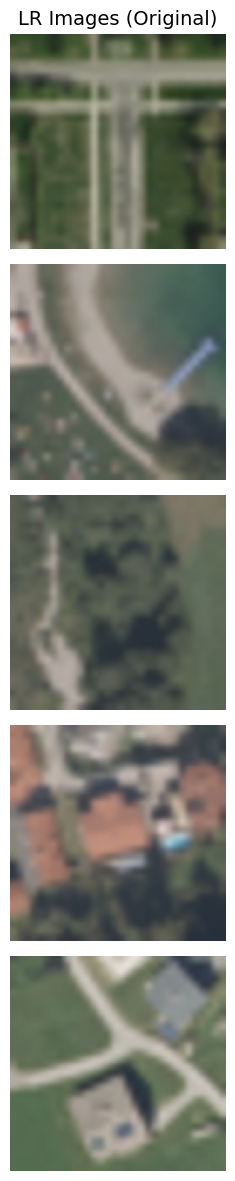

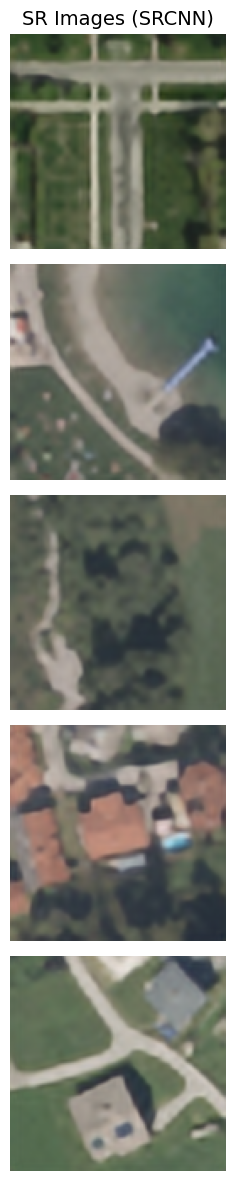

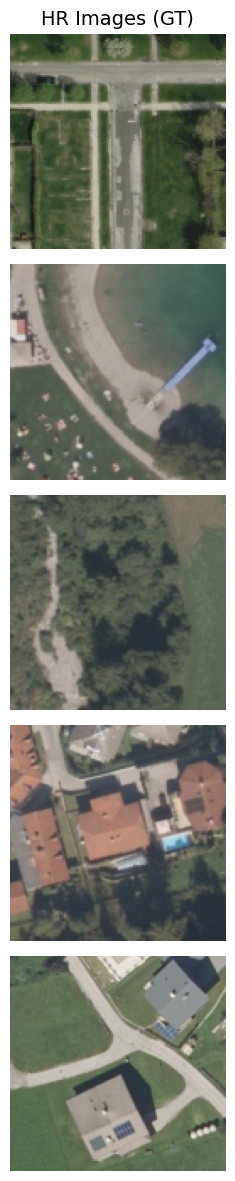

In [9]:
%load_ext autoreload
%autoreload 2
import os 
os.chdir("/home/jadli/Desktop/BDAI2/Satellite_Super_Resulotion0")
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from skimage.metrics import structural_similarity as ssim
from src.utils.models_architecture import EDSR, SRCNN

# ================= CONFIG =================
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

TEST_DIR = "data_test"
HR_DIR = "data/preprocessed/test/HR"
BEST_MODEL_PATH = "MODEL_TEST/best_SRCNN.pth"   # <-- SRCNN checkpoint
SCALE = 4

to_tensor = transforms.ToTensor()

# ================= LOAD SRCNN MODEL =================
model = SRCNN().to(DEVICE)   # <-- your SRCNN class
ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
model.load_state_dict(ckpt["model"])
model.eval()

print("✔ SRCNN model loaded")

# ================= LOAD IMAGES =================
img_names = sorted(os.listdir(TEST_DIR))

lr_imgs, sr_imgs, hr_imgs = [], [], []

with torch.no_grad():
    for name in img_names:
        # LR image
        lr_img = Image.open(os.path.join(TEST_DIR, name)).convert("RGB")
        lr_img = lr_img.resize(
            (lr_img.width * SCALE, lr_img.height * SCALE),
            Image.BICUBIC
        )  

        # HR image
        hr_img = Image.open(os.path.join(HR_DIR, name)).convert("RGB")

        lr = to_tensor(lr_img).unsqueeze(0).to(DEVICE)

        # SRCNN inference
        sr = model(lr)
        sr = torch.clamp(sr, 0.0, 1.0)

        lr_imgs.append(lr_img)
        sr_imgs.append(sr.squeeze().permute(1, 2, 0).cpu())
        hr_imgs.append(hr_img)

# ================= PLOT FUNCTION =================
def plot_column(images, title):
    fig, axes = plt.subplots(len(images), 1, figsize=(4, 12))

    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.96)
    plt.show()

# ================= PLOTS =================
plot_column(lr_imgs, "LR Images (Original)")
plot_column(sr_imgs, "SR Images (SRCNN)")
plot_column(hr_imgs, "HR Images (GT)")


In [ ]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from skimage.metrics import structural_similarity as ssim
import numpy as np
from src.utils.models_architecture import EDSR, EDSR


# =====================================================
# CONFIGURATION
# =====================================================
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

TEST_DIR = "data_test"
HR_DIR = "data/preprocessed/test/HR"
BEST_MODEL_PATH = "MODEL_TEST/best_EDSR.pth"

SCALE = 4
TARGET_SIZE = (256, 256)   # ⭐ Taille FIXE → reproductibilité

to_tensor = transforms.ToTensor()

# =====================================================
# METRICS
# =====================================================
def compute_psnr(sr, hr):
    mse = torch.mean((sr - hr) ** 2)
    if mse == 0:
        return float("inf")
    return 20 * torch.log10(1.0 / torch.sqrt(mse))

def compute_ssim(sr, hr):
    sr_np = sr.squeeze().permute(1, 2, 0).cpu().numpy()
    hr_np = hr.squeeze().permute(1, 2, 0).cpu().numpy()
    return ssim(sr_np, hr_np, channel_axis=2, data_range=1.0)

# =====================================================
# LOAD EDSR MODEL
# =====================================================
model = EDSR().to(DEVICE)
ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
model.load_state_dict(ckpt["model"])
model.eval()

print("✔ EDSR model loaded successfully")

# =====================================================
# LOAD & PROCESS IMAGES
# =====================================================
img_names = sorted(os.listdir(TEST_DIR))

lr_imgs, sr_imgs, hr_imgs = [], [], []
sr_metrics = []

with torch.no_grad():
    for name in img_names:
        # -------- Load images --------
        lr_img = Image.open(os.path.join(TEST_DIR, name)).convert("RGB")
        hr_img = Image.open(os.path.join(HR_DIR, name)).convert("RGB")

        # -------- Resize (reproducible) --------
        lr_up = lr_img.resize(TARGET_SIZE, Image.BICUBIC)
        hr_img = hr_img.resize(TARGET_SIZE, Image.BICUBIC)

        lr = to_tensor(lr_up).unsqueeze(0).to(DEVICE)
        hr = to_tensor(hr_img).unsqueeze(0).to(DEVICE)

        # -------- EDSR inference --------
        sr = torch.clamp(model(lr), 0.0, 1.0)

        # -------- Metrics --------
        psnr_val = compute_psnr(sr, hr).item()
        ssim_val = compute_ssim(sr, hr)

        # -------- Store --------
        lr_imgs.append(lr_up)
        sr_imgs.append(sr.squeeze().permute(1, 2, 0).cpu())
        hr_imgs.append(hr_img)
        sr_metrics.append((psnr_val, ssim_val))

# =====================================================
# PLOTTING FUNCTIONS
# =====================================================
def plot_lr(images):
    fig, axes = plt.subplots(len(images), 1, figsize=(4, 12))
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.set_title("PSNR: +∞ dB | SSIM: 1.000", fontsize=9)
        ax.axis("off")

    plt.suptitle("LR Images ", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

def plot_sr(images, metrics):
    fig, axes = plt.subplots(len(images), 1, figsize=(4, 12))
    for ax, img, (p, s) in zip(axes, images, metrics):
        ax.imshow(img)
        ax.set_title(f"PSNR: {p:.2f} dB | SSIM: {s:.3f}", fontsize=9)
        ax.axis("off")

    plt.suptitle("SR EDSR", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

def plot_hr(images):
    fig, axes = plt.subplots(len(images), 1, figsize=(4, 12))
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.set_title("PSNR: +∞ dB | SSIM: 1.000", fontsize=9)
        ax.axis("off")

    plt.suptitle("HR Images", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# =====================================================
# DISPLAY RESULTS
# =====================================================
plot_lr(lr_imgs)
plot_sr(sr_imgs, sr_metrics)
plot_hr(hr_imgs)


/tmp/ipykernel_70821/1598188946.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)


✔ SRCNN model loaded successfully


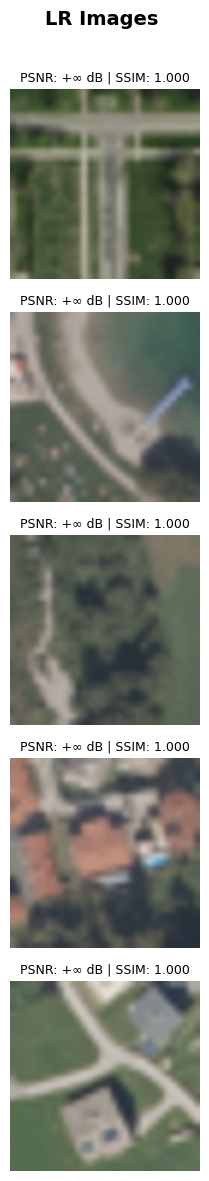

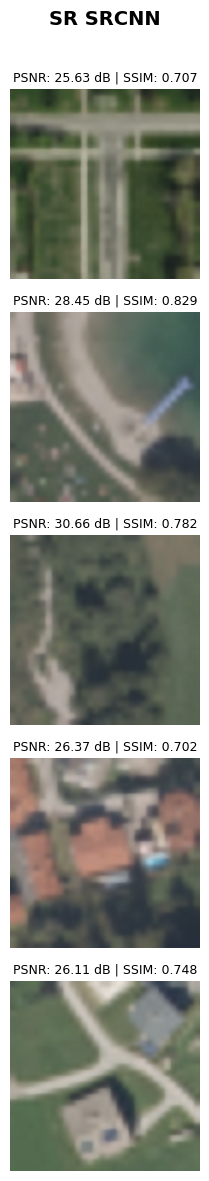

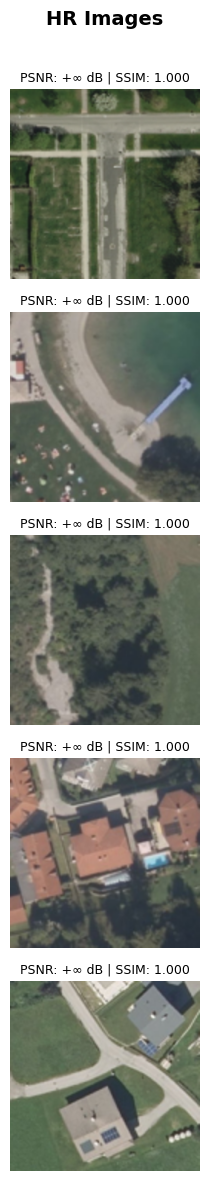

In [18]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from skimage.metrics import structural_similarity as ssim
import numpy as np
from src.utils.models_architecture import EDSR, SRCNN


# =====================================================
# CONFIGURATION
# =====================================================
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

TEST_DIR = "data_test"
HR_DIR = "data/preprocessed/test/HR"
BEST_MODEL_PATH = "MODEL_TEST/best_SRCNN.pth"

SCALE = 4
TARGET_SIZE = (256, 256)   # ⭐ Taille FIXE → reproductibilité

to_tensor = transforms.ToTensor()

# =====================================================
# METRICS
# =====================================================
def compute_psnr(sr, hr):
    mse = torch.mean((sr - hr) ** 2)
    if mse == 0:
        return float("inf")
    return 20 * torch.log10(1.0 / torch.sqrt(mse))

def compute_ssim(sr, hr):
    sr_np = sr.squeeze().permute(1, 2, 0).cpu().numpy()
    hr_np = hr.squeeze().permute(1, 2, 0).cpu().numpy()
    return ssim(sr_np, hr_np, channel_axis=2, data_range=1.0)

# =====================================================
# LOAD SRCNN MODEL
# =====================================================
model = SRCNN().to(DEVICE)
ckpt = torch.load(BEST_MODEL_PATH, map_location=DEVICE)
model.load_state_dict(ckpt["model"])
model.eval()

print("✔ SRCNN model loaded successfully")

# =====================================================
# LOAD & PROCESS IMAGES
# =====================================================
img_names = sorted(os.listdir(TEST_DIR))

lr_imgs, sr_imgs, hr_imgs = [], [], []
sr_metrics = []

with torch.no_grad():
    for name in img_names:
        # -------- Load images --------
        lr_img = Image.open(os.path.join(TEST_DIR, name)).convert("RGB")
        hr_img = Image.open(os.path.join(HR_DIR, name)).convert("RGB")

        # -------- Resize (reproducible) --------
        lr_up = lr_img.resize(TARGET_SIZE, Image.BICUBIC)
        hr_img = hr_img.resize(TARGET_SIZE, Image.BICUBIC)

        lr = to_tensor(lr_up).unsqueeze(0).to(DEVICE)
        hr = to_tensor(hr_img).unsqueeze(0).to(DEVICE)

        # -------- SRCNN inference --------
        sr = torch.clamp(model(lr), 0.0, 1.0)

        # -------- Metrics --------
        psnr_val = compute_psnr(sr, hr).item()
        ssim_val = compute_ssim(sr, hr)

        # -------- Store --------
        lr_imgs.append(lr_up)
        sr_imgs.append(sr.squeeze().permute(1, 2, 0).cpu())
        hr_imgs.append(hr_img)
        sr_metrics.append((psnr_val, ssim_val))

# =====================================================
# PLOTTING FUNCTIONS
# =====================================================
def plot_lr(images):
    fig, axes = plt.subplots(len(images), 1, figsize=(4, 12))
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.set_title("PSNR: +∞ dB | SSIM: 1.000", fontsize=9)
        ax.axis("off")

    plt.suptitle("LR Images ", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

def plot_sr(images, metrics):
    fig, axes = plt.subplots(len(images), 1, figsize=(4, 12))
    for ax, img, (p, s) in zip(axes, images, metrics):
        ax.imshow(img)
        ax.set_title(f"PSNR: {p:.2f} dB | SSIM: {s:.3f}", fontsize=9)
        ax.axis("off")

    plt.suptitle("SR SRCNN", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

def plot_hr(images):
    fig, axes = plt.subplots(len(images), 1, figsize=(4, 12))
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.set_title("PSNR: +∞ dB | SSIM: 1.000", fontsize=9)
        ax.axis("off")

    plt.suptitle("HR Images", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# =====================================================
# DISPLAY RESULTS
# =====================================================
plot_lr(lr_imgs)
plot_sr(sr_imgs, sr_metrics)
plot_hr(hr_imgs)
